In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

<h2> First steps on data </h2>

Let's start by importing the data to a DataFrame.

In [2]:
data_all = pd.read_csv('WineQuality.csv')

In [3]:
data_all.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [7]:
data_all.shape

(32485, 14)

We have 14 columns. Let's get informations about them and the dataset in general.

In [4]:
data_all.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,3251.548376,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1873.780954,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1627.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,4875.000000,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


It seems that we don't have any missing values. Most of the types are float64. 

In [9]:
data_all.nunique()

Unnamed: 0              6449
fixed acidity            106
volatile acidity         186
citric acid               89
residual sugar           316
chlorides                223
free sulfur dioxide      135
total sulfur dioxide     276
density                  996
pH                       108
sulphates                111
alcohol                  112
quality                    7
Type                       2
dtype: int64

Like we expected, we have 2 possibilities for Type : red or white wine. Our goal will be, first, to determine if a wine is red or white depending on the other variables. Then, we will create another model predicting the quality of the wine depending on the other factors. 

<h2> Is the wine red or white ? </h2>

We want to classify the wine in two categories using the other variables. Let's try to use Random Forest.

<h4> Data visualization </h4>

In [10]:
data_all.drop('Unnamed: 0', axis=1, inplace=True)

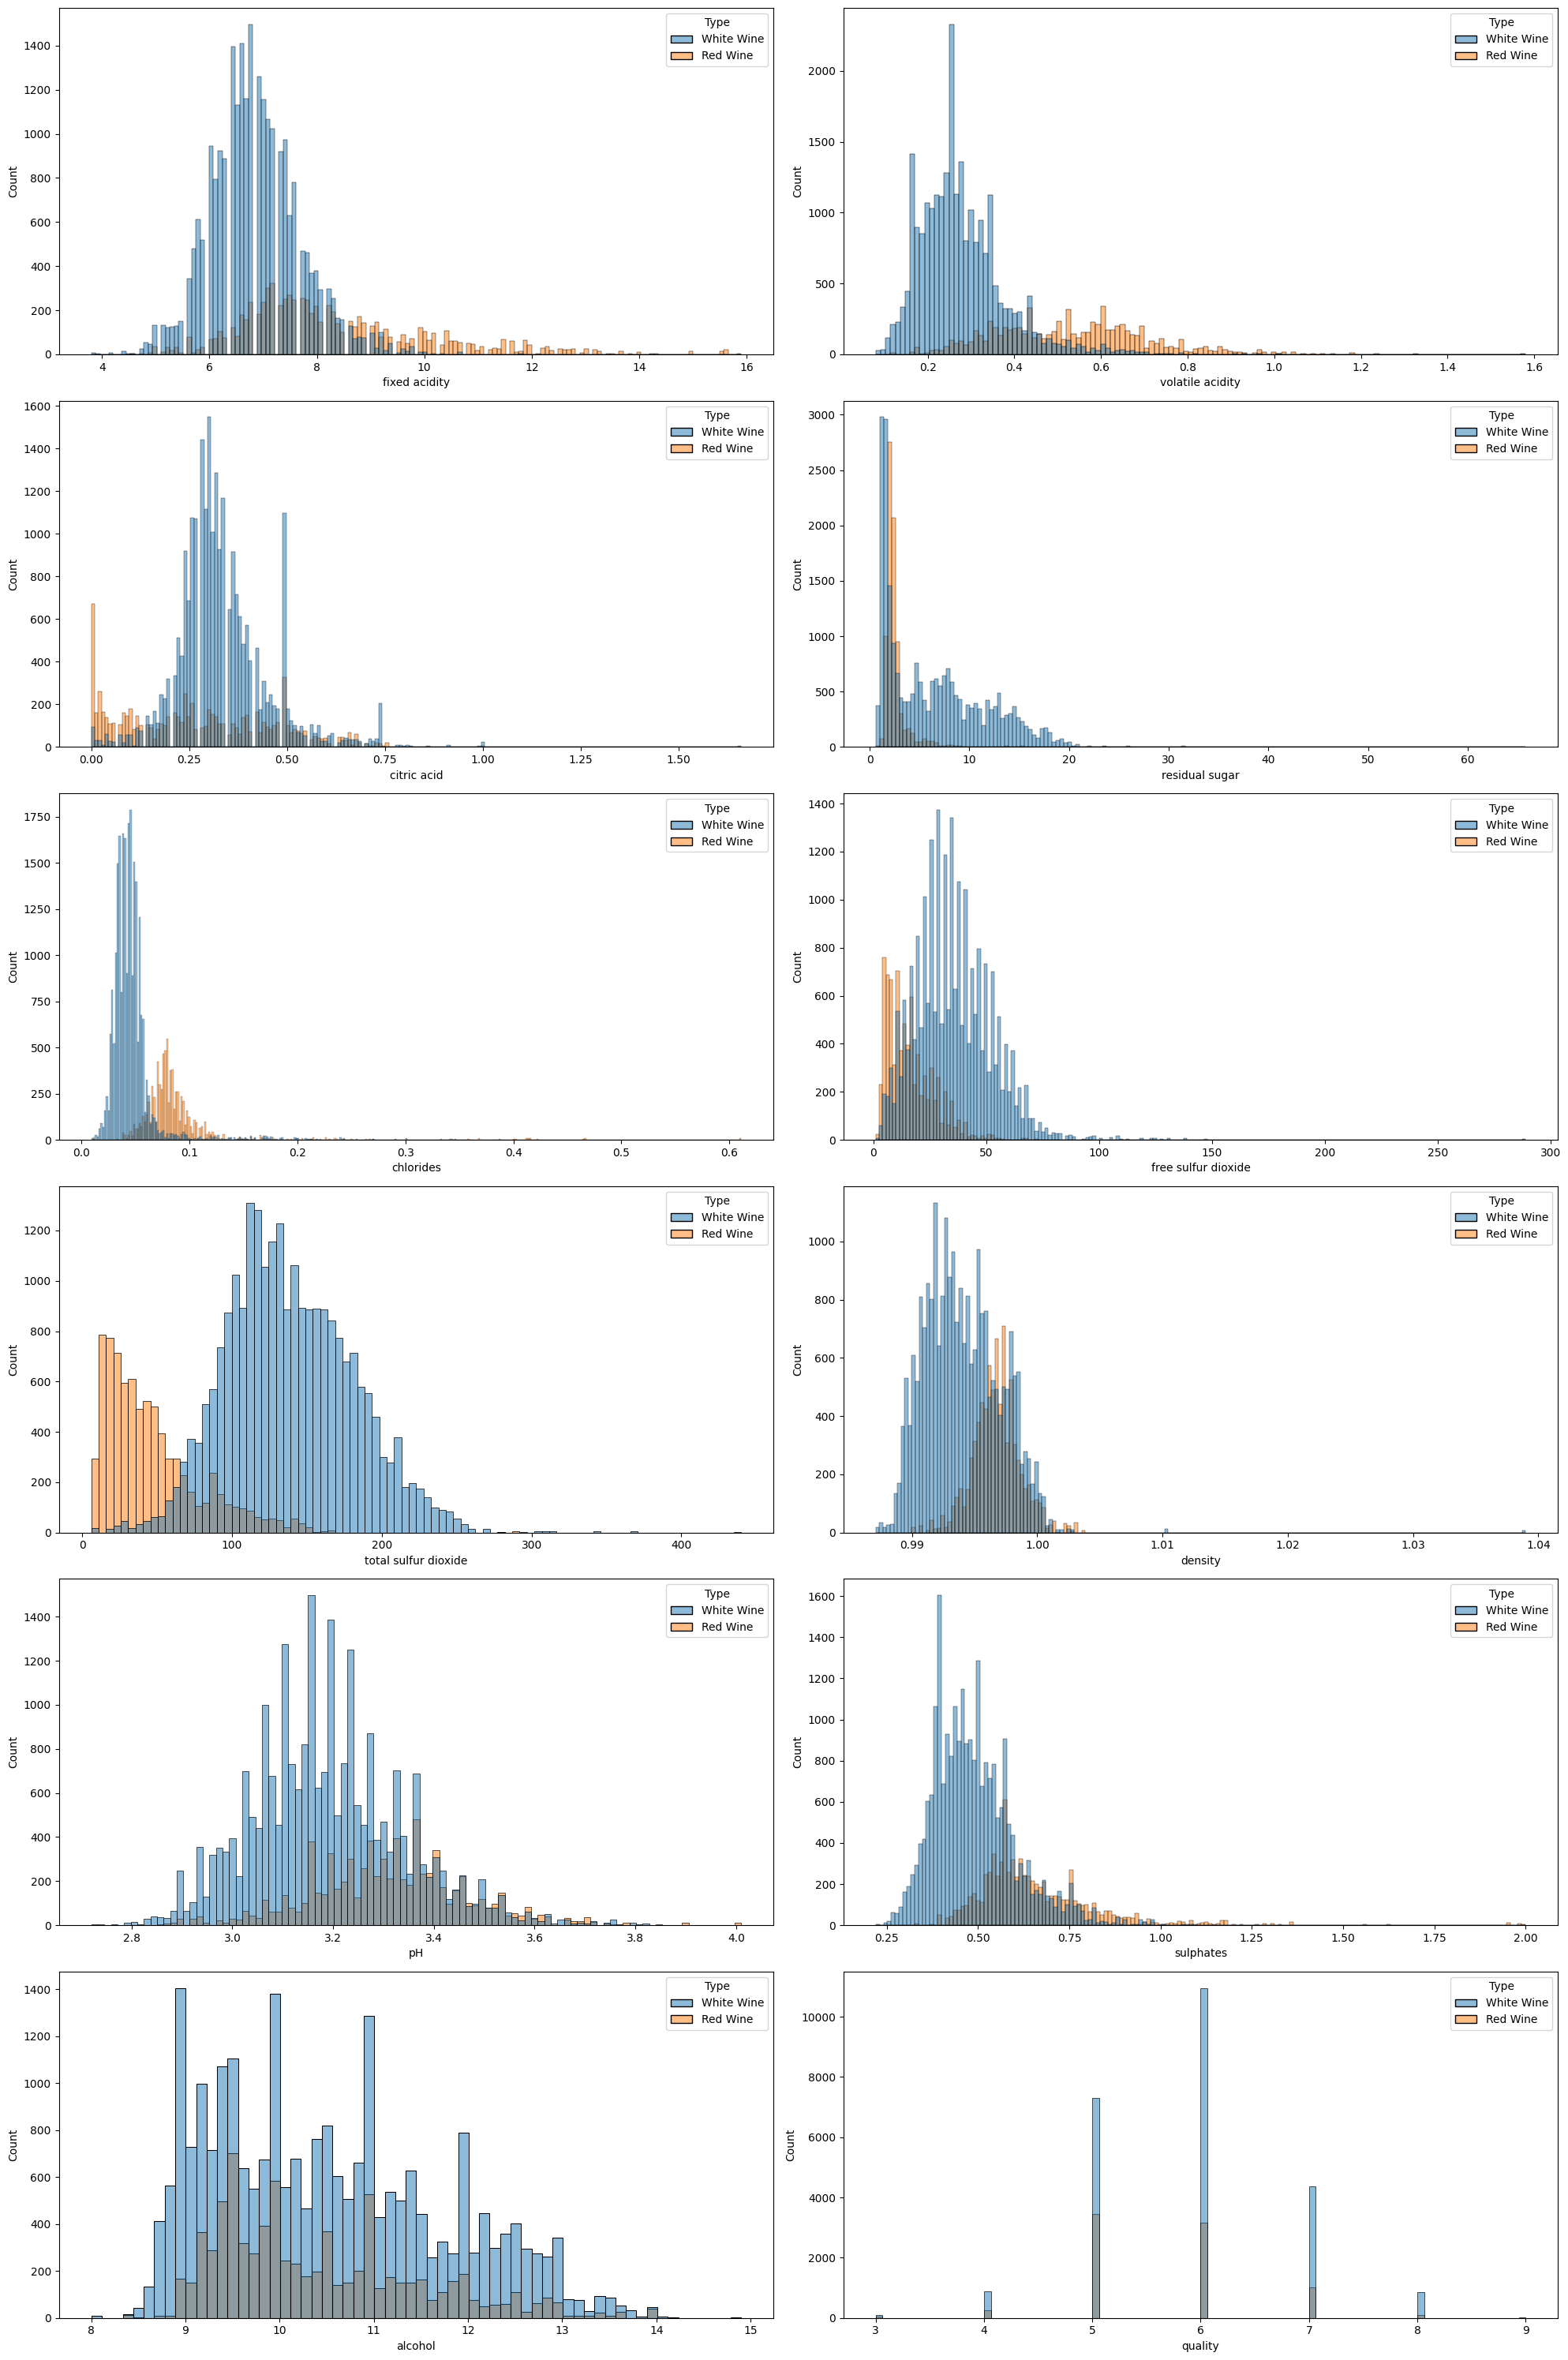

In [29]:
#we want it depending on the type
column = data_all.columns.drop('Type')

#create plots
plt.figure(figsize = (20,30))
for i,j in enumerate(column):
    ax = plt.subplot(6,2, i+1)
    sns.histplot(x = data_all[j], hue = data_all['Type'])
plt.tight_layout()

Some variables seem to help differenciate red and white wine, like sulfur dioxide for example.

<h4>Model </h4>

In [35]:
#separate test and train
x_train, x_test, y_train, y_test = train_test_split(data_all.drop('Type', axis=1), data_all.Type)

In [36]:
#scale the data
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [38]:
#start random forest
model = RandomForestClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

In [42]:
print('Train data report : ')
print(classification_report(y_train, train_pred))

print('Test data report : ')
print(classification_report(y_test, test_pred))

Train data report : 
              precision    recall  f1-score   support

    Red Wine       1.00      1.00      1.00      6000
  White Wine       1.00      1.00      1.00     18363

    accuracy                           1.00     24363
   macro avg       1.00      1.00      1.00     24363
weighted avg       1.00      1.00      1.00     24363

Test data report : 
              precision    recall  f1-score   support

    Red Wine       1.00      1.00      1.00      2032
  White Wine       1.00      1.00      1.00      6090

    accuracy                           1.00      8122
   macro avg       1.00      1.00      1.00      8122
weighted avg       1.00      1.00      1.00      8122



We get 100% accuracy, it's a victory ! Now let's get to more complicated things.

<h2>How to check the quality of the wine ? </h2>

<h4>Data visualization </h4>

In [ ]:
data_all = pd.read_csv('WineQuality.csv')

In [ ]:
data_all.drop('Unnamed: 0', axis=1, inplace=True)

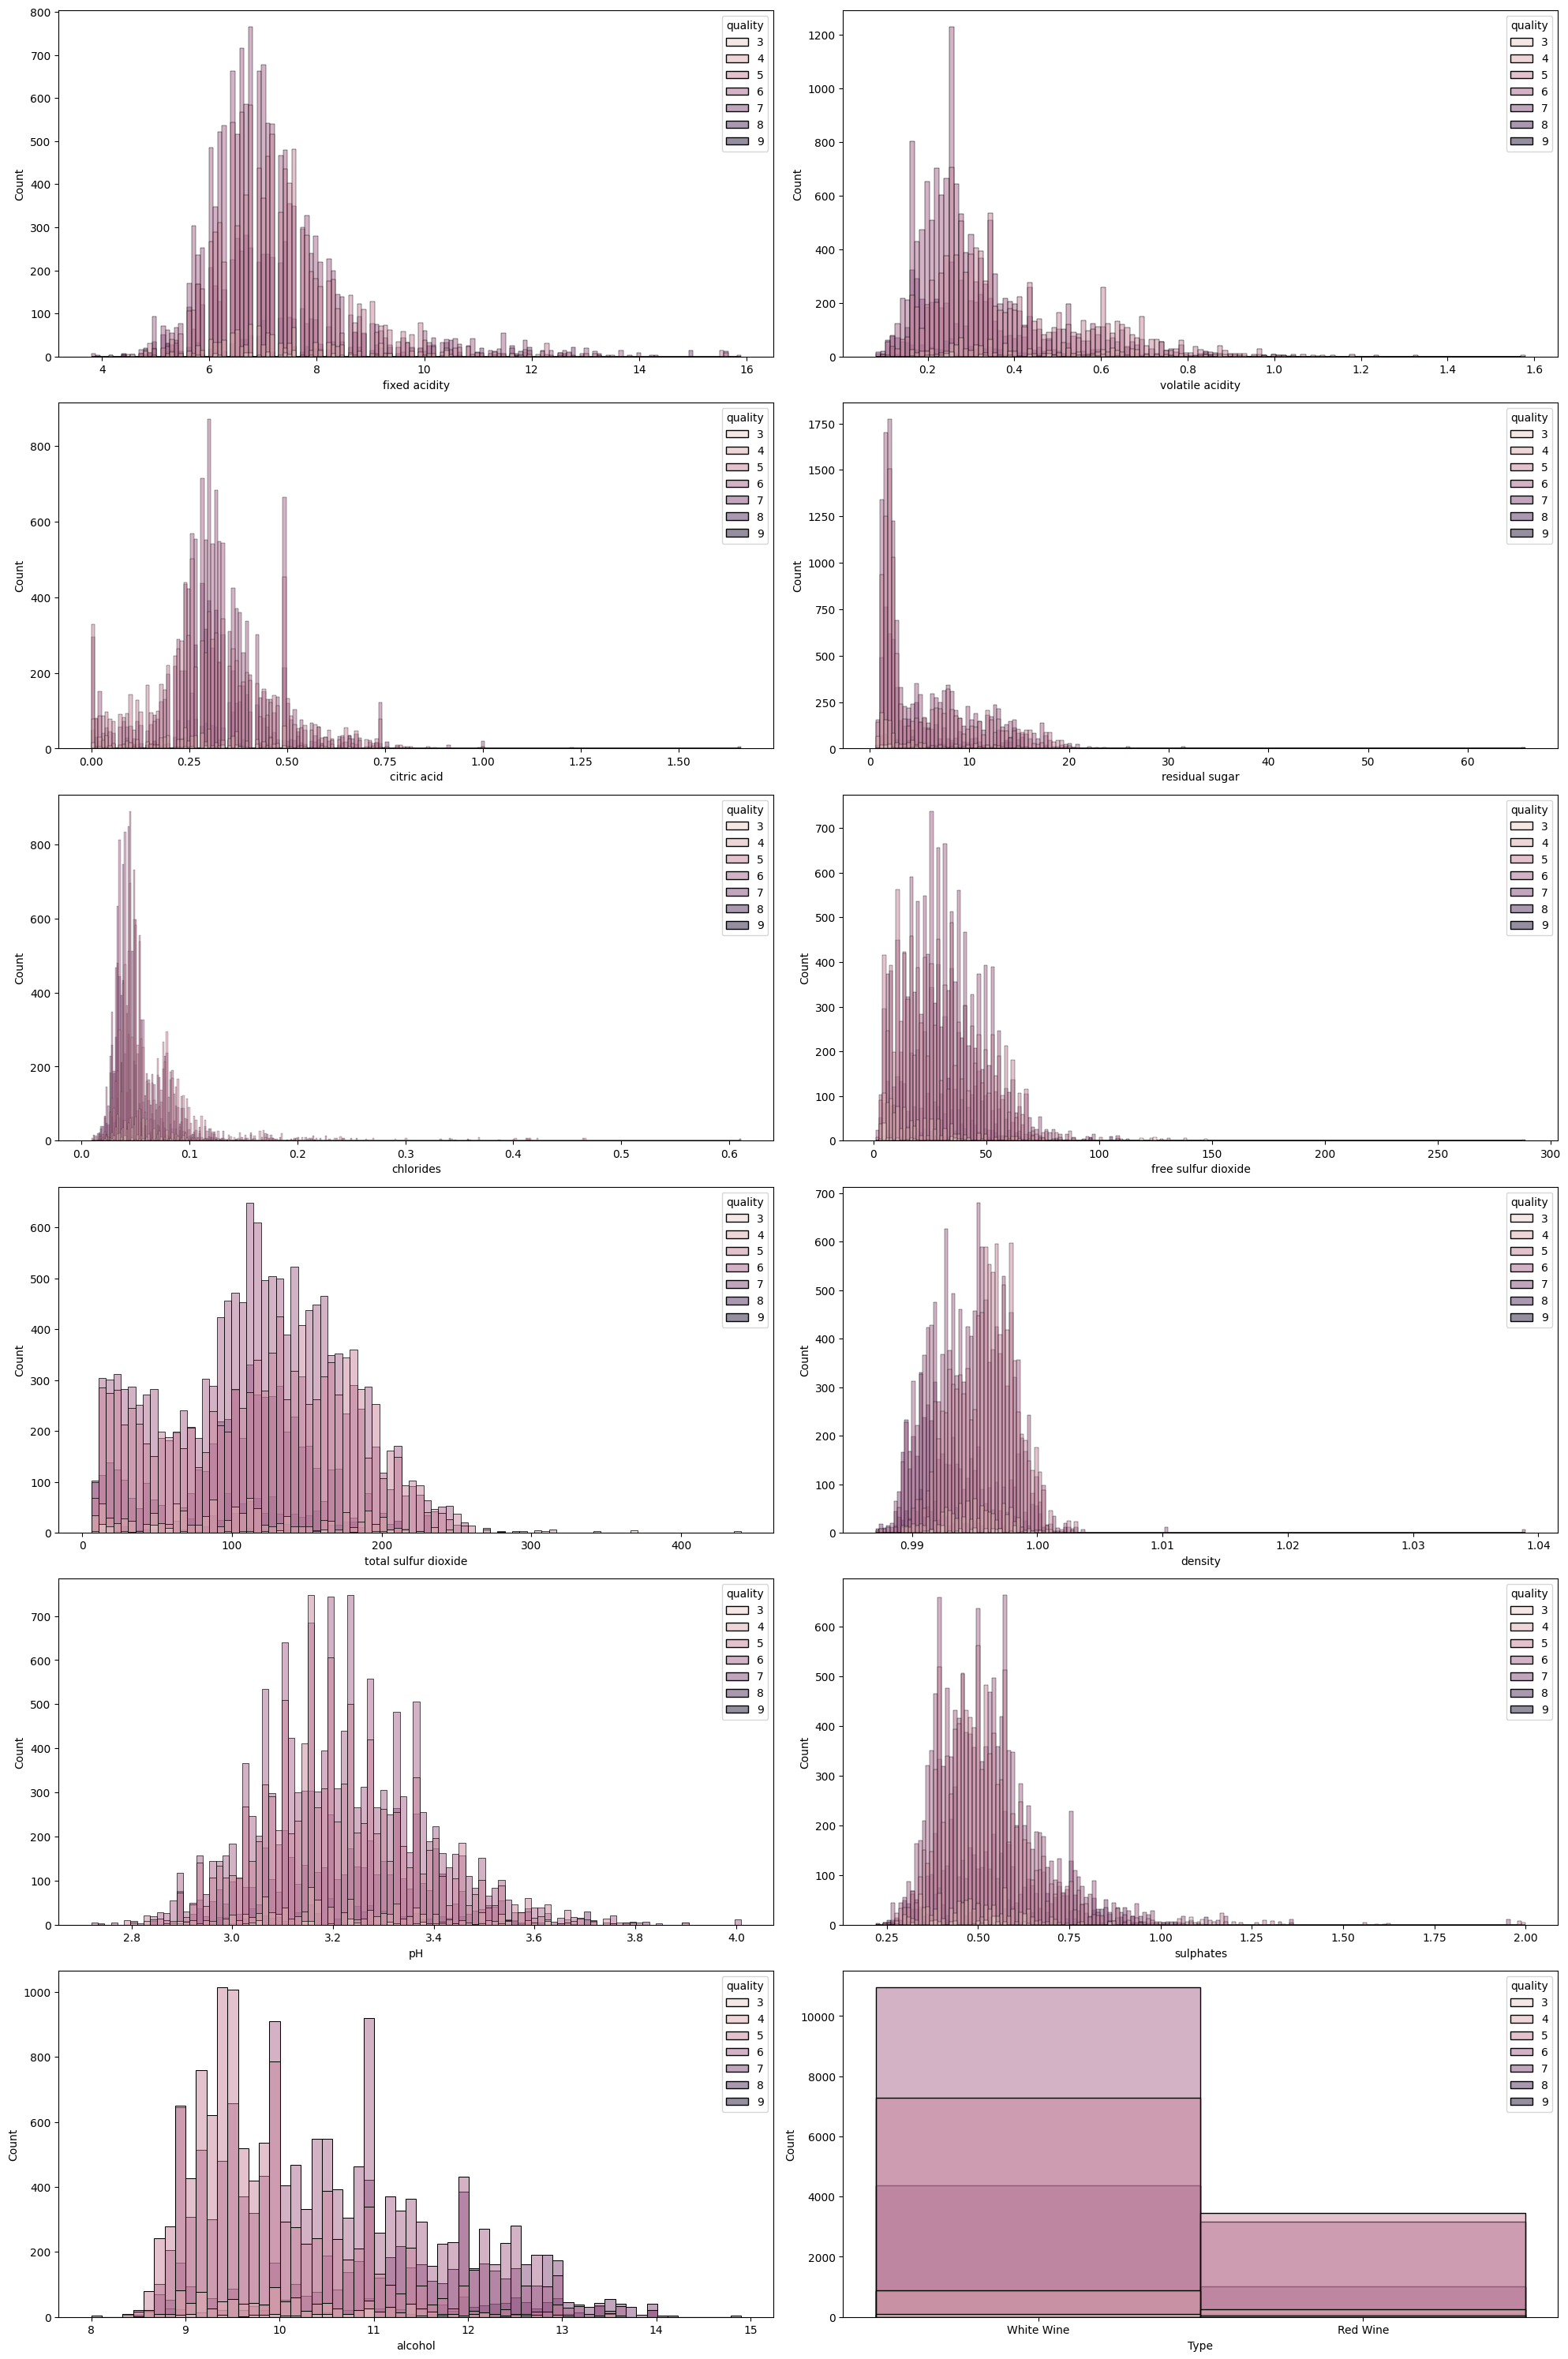

In [32]:
#we want it depending on the type
column = data_all.columns.drop('quality')

#create plots
plt.figure(figsize = (20,30))
for i,j in enumerate(column):
    ax = plt.subplot(6,2, i+1)
    sns.histplot(x = data_all[j], hue = data_all['quality'])
plt.tight_layout()

<h4>Model </h4>

We try to apply random forest too : 

In [50]:
data = data_all.drop('Type', axis=1)

In [51]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5


In [62]:
#separate test and train
x_train, x_test, y_train, y_test = train_test_split(data.drop('quality', axis=1), data.quality)

In [63]:
#scale the data
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [64]:
#start random forest
model = RandomForestClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

In [65]:
print('Train data report : ')
print(classification_report(y_train, train_pred))

print('Test data report : ')
print(classification_report(y_test, test_pred))

Train data report : 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00       865
           5       1.00      1.00      1.00      8080
           6       1.00      1.00      1.00     10551
           7       1.00      1.00      1.00      4047
           8       1.00      1.00      1.00       700
           9       1.00      1.00      1.00        19

    accuracy                           1.00     24363
   macro avg       1.00      1.00      1.00     24363
weighted avg       1.00      1.00      1.00     24363

Test data report : 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        32
           4       0.99      0.99      0.99       279
           5       0.99      1.00      0.99      2675
           6       1.00      0.99      0.99      3566
           7       0.99      1.00      0.99      1324
           8       1.00      1.00    

Like expected, we have 100% accuracy on train (obviously), however we have 99% on some qualities for test.

In [66]:
confusion_matrix(y_test, test_pred)

array([[  32,    0,    0,    0,    0,    0,    0],
       [   0,  277,    2,    0,    0,    0,    0],
       [   0,    2, 2662,   11,    0,    0,    0],
       [   0,    0,   28, 3533,    5,    0,    0],
       [   0,    0,    0,    5, 1318,    1,    0],
       [   0,    0,    0,    0,    0,  241,    0],
       [   0,    0,    0,    0,    3,    0,    2]])

The qualities that we didn't get are still close to what they should be (like 3 instead of 4...).